# OJ Purchase Classification Models  
**Author:** Julia Perrin  

This project predicts whether a customer purchases Citrus Hill or Minute Maid orange juice using the `OJ` dataset. It explores various machine learning classification models, including Decision Trees, Logistic Regression, and K-Nearest Neighbors, and compares their performance using cross-validation and accuracy metrics.


## Summary of Results  
- **Decision Tree:** Achieved good training accuracy but showed signs of overfitting.  
- **Logistic Regression:** More balanced generalization with competitive accuracy and better interpretability.  
- **KNN:** Performance depended heavily on the value of *k*; tuned using cross-validation.  

Cross-validation and confusion matrices were used to evaluate models. In practice, Logistic Regression proved the most robust for this dataset.


In [1]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas==2.2.2 scipy==1.11.4 scikit-learn==1.5.0 statsmodels==0.14.2 --quiet

created virtual environment CPython3.11.12.final.0-64 in 667ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==25.0.1, setuptools==78.1.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingRegressor as GBR, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder

from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from ISLP.bart import BART
from ISLP.torch import SimpleDataModule, SimpleModule, ErrorTracker

import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

from pytorch_lightning import Trainer, seed_everything

from torchmetrics import MeanAbsoluteError

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e1414e4d3a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


Training Error Rate: 0.010680907877169576


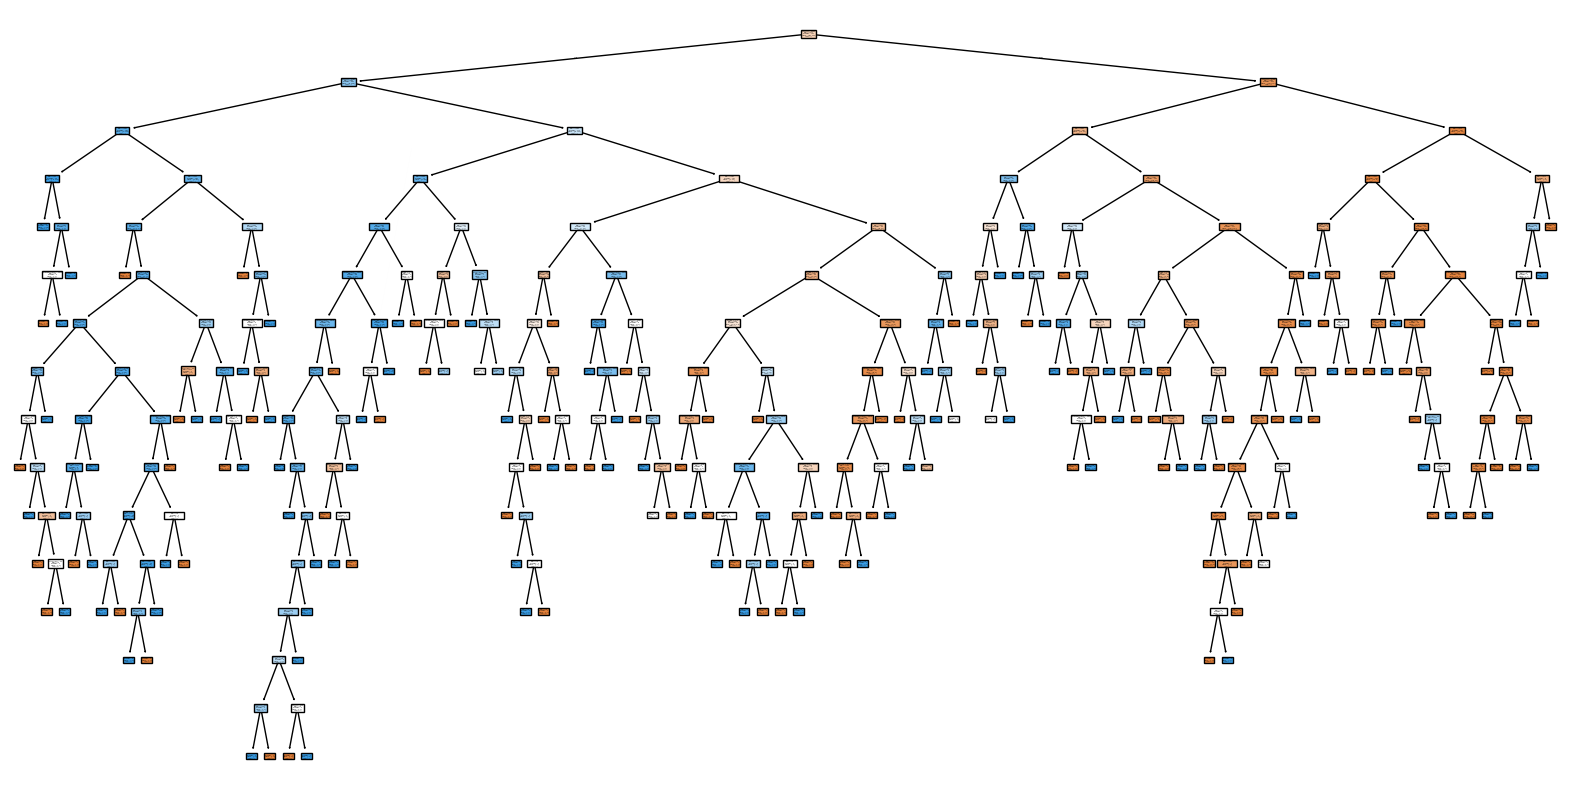

Number of terminal nodes: 162
Tree Summary:
 |--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- PriceDiff <= 0.31
|   |   |   |   |--- class: 1
|   |   |   |--- PriceDiff >  0.31
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- WeekofPurchase <= 269.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- WeekofPurchase >  269.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- class: 1
|   |   |--- LoyalCH >  0.04
|   |   |   |--- SalePriceCH <= 1.98
|   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- LoyalCH >  0.04
|   |   |   |   |   |--- DiscCH <= 0.05
|   |   |   |   |   |   |--- PriceCH <= 1.72
|   |   |   |   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |   |   |   |--- LoyalCH <= 0.10
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- LoyalCH >  0.10
|   |   |   |   |   |   |   |   | 

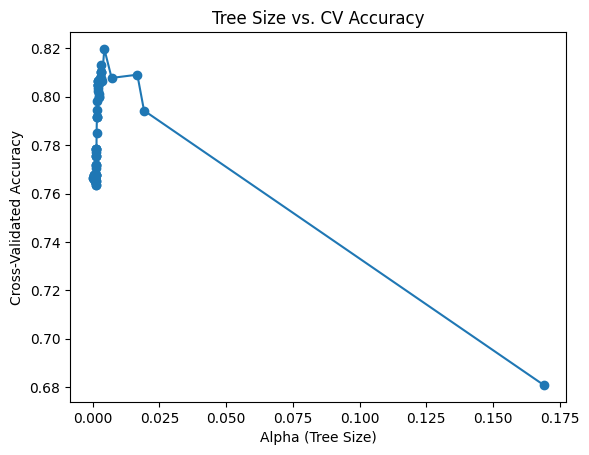

Optimal Tree Alpha: 0.004356168975661625
Unpruned Training Error Rate: 0.010680907877169576
Pruned Training Error Rate: 0.15353805073431237
Unpruned Test Error Rate: 0.23676012461059193
Pruned Test Error Rate: 0.1900311526479751


In [3]:

# Load the OJ dataset
OJ = load_data('OJ')

# 1. Create training and test sets
np.random.seed(0)
train_set, test_set = train_test_split(OJ, test_size=0.3, stratify=OJ['Purchase'])

label_encoder = LabelEncoder()
train_set['Purchase'] = label_encoder.fit_transform(train_set['Purchase'])
test_set['Purchase'] = label_encoder.transform(test_set['Purchase'])

categorical_cols = train_set.select_dtypes(include=['object', 'category']).columns
train_set = pd.get_dummies(train_set, columns=categorical_cols, drop_first=True)
test_set = pd.get_dummies(test_set, columns=categorical_cols, drop_first=True)

# Align test set columns with training set columns
test_set = test_set.reindex(columns=train_set.columns, fill_value=0)

X_train = train_set.drop(columns='Purchase')
y_train = train_set['Purchase']
X_test = test_set.drop(columns='Purchase')
y_test = test_set['Purchase']

# 2. Fit a decision tree
tree = DTC(random_state=0)
tree.fit(X_train, y_train)

# Training error rate
train_preds = tree.predict(X_train)
train_error_rate = 1 - accuracy_score(y_train, train_preds)
print(f"Training Error Rate: {train_error_rate}")

# 3. Plot the tree
class_names = [str(cls) for cls in tree.classes_]

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_train.columns, class_names=class_names, filled=True)
plt.show()

print(f"Number of terminal nodes: {tree.get_n_leaves()}")

from sklearn.tree import export_text

tree_text = export_text(tree, feature_names=list(X_train.columns))

print("Tree Summary:\n", tree_text)


test_preds = tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_preds)
test_error_rate = 1 - accuracy_score(y_test, test_preds)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Test Error Rate: {test_error_rate}")

cv = KFold(n_splits=10, shuffle=True, random_state=0)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
cv_scores = []

for alpha in ccp_alphas:
    tree = DTC(random_state=0, ccp_alpha=alpha)
    scores = cross_val_score(tree, X_train, y_train, cv=cv)
    cv_scores.append(np.mean(scores))

# 7. Plot tree size vs. CV error
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]
plt.plot(ccp_alphas, cv_scores, marker='o')
plt.xlabel("Alpha (Tree Size)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Tree Size vs. CV Accuracy")
plt.show()

print(f"Optimal Tree Alpha: {optimal_alpha}")

pruned_tree = DTC(random_state=0, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# 10. Training error rates comparison
pruned_train_preds = pruned_tree.predict(X_train)
pruned_train_error_rate = 1 - accuracy_score(y_train, pruned_train_preds)

print(f"Unpruned Training Error Rate: {train_error_rate}")
print(f"Pruned Training Error Rate: {pruned_train_error_rate}")

pruned_test_preds = pruned_tree.predict(X_test)
pruned_test_error_rate = 1 - accuracy_score(y_test, pruned_test_preds)

print(f"Unpruned Test Error Rate: {test_error_rate}")
print(f"Pruned Test Error Rate: {pruned_test_error_rate}")


In [4]:

# Load the Caravan dataset
Caravan = load_data('Caravan')

# 1. Split the dataset into training and test sets
train_set = Caravan.iloc[:1000].copy()
test_set = Caravan.iloc[1000:].copy()

label_encoder = LabelEncoder()
train_set.loc[:, 'Purchase'] = label_encoder.fit_transform(train_set['Purchase'])
test_set.loc[:, 'Purchase'] = label_encoder.transform(test_set['Purchase'])

categorical_cols = train_set.select_dtypes(include=['object', 'category']).columns
train_set = pd.get_dummies(train_set, columns=categorical_cols, drop_first=True)
test_set = pd.get_dummies(test_set, columns=categorical_cols, drop_first=True)

# Align test set columns with training set columns
test_set = test_set.reindex(columns=train_set.columns, fill_value=0)

X_train = train_set.drop(columns='Purchase')
y_train = train_set['Purchase']
X_test = test_set.drop(columns='Purchase')
y_test = test_set['Purchase']

# 2. Fit a boosting model
boosting_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=0)
boosting_model.fit(X_train, y_train)

importance = boosting_model.feature_importances_
print("Feature Importances:", importance)

test_preds_prob = boosting_model.predict_proba(X_test)[:, 1]
test_preds = (test_preds_prob > 0.2).astype(int)

conf_matrix = confusion_matrix(y_test, test_preds)
print(f"Confusion Matrix:\n{conf_matrix}")

fraction_correct = conf_matrix[1, 1] / conf_matrix[:, 1].sum() if conf_matrix[:, 1].sum() > 0 else 0
print(f"Fraction of Predicted Purchases Correct: {fraction_correct}")



importance = boosting_model.feature_importances_

predictor_names = train_set.drop(columns='Purchase').columns

importance_df = pd.DataFrame({'Predictor': predictor_names, 'Importance': importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

N = 5
print(f"Top {N} Most Important Predictors:\n{importance_df.head(N)}")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_probs = knn_model.predict_proba(X_test)[:, 1]
knn_preds = (knn_probs > 0.2).astype(int)
knn_conf_matrix = confusion_matrix(y_test, knn_preds)
knn_fraction_correct = knn_conf_matrix[1, 1] / knn_conf_matrix[:, 1].sum()
print(f"KNN Confusion Matrix:\n{knn_conf_matrix}")
print(f"KNN Fraction of Predicted Purchases Correct: {knn_fraction_correct}")


logistic_model = LogisticRegression(random_state=0, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
logistic_preds = (logistic_probs > 0.2).astype(int)
logistic_conf_matrix = confusion_matrix(y_test, logistic_preds)
logistic_fraction_correct = logistic_conf_matrix[1, 1] / logistic_conf_matrix[:, 1].sum()
print(f"Logistic Regression Confusion Matrix:\n{logistic_conf_matrix}")
print(f"Logistic Regression Fraction of Predicted Purchases Correct: {logistic_fraction_correct}")



<ipython-input-4-b4f4b5787d1b>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 

Feature Importances: [6.77530616e-02 6.70403378e-04 2.89576823e-03 5.10060373e-03
 8.99836592e-03 9.56798116e-03 3.33296703e-02 4.79451336e-03
 5.29656116e-02 1.94572404e-02 7.05412961e-03 6.35804482e-03
 2.61576460e-02 1.51246782e-02 1.28435889e-02 4.56285958e-02
 7.71802873e-03 2.35211166e-03 7.82730105e-03 2.72998218e-03
 5.52256667e-03 4.08276762e-02 2.04917308e-02 1.97197589e-03
 1.33039289e-02 2.14794675e-02 3.62124150e-03 2.92772136e-03
 7.73801706e-03 4.23526183e-03 2.27563080e-03 4.15569976e-03
 6.00565982e-03 6.09841658e-03 7.96158245e-03 8.00233363e-03
 1.36746580e-02 1.40075813e-02 4.32091035e-03 8.81719049e-03
 1.67770818e-04 5.63425982e-03 4.75981455e-02 2.06314742e-02
 3.11964259e-05 3.60200558e-04 7.45932963e-02 4.14649731e-05
 4.08870867e-03 0.00000000e+00 0.00000000e+00 5.28620522e-04
 0.00000000e+00 0.00000000e+00 2.57742023e-02 0.00000000e+00
 1.94613747e-02 1.80051833e-02 3.02068143e-02 8.51633571e-03
 3.38119822e-02 4.38306949e-04 2.62623262e-06 1.79612923e-02
 6.

INFO:lightning_fabric.utilities.seed:Seed set to 0


Linear Regression MAE: 0.5494496936308123
Boosting MAE: 0.3170114712975893


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | model | HittersNN | 1.1 K 
1 | loss  | MSELoss   | 0     
------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.98186206817627      │
│         test_mae          │     2.328535556793213     │
└───────────────────────────┴───────────────────────────┘

Neural Network MAE: 2.328535556793213
Bagging MAE: 0.32832397411628905
Top 5 Most Important Predictors:
   Predictor  Importance
7     CAtBat    0.472924
11      CRBI    0.108353
8      CHits    0.061330
5      Walks    0.052024
12    CWalks    0.044944


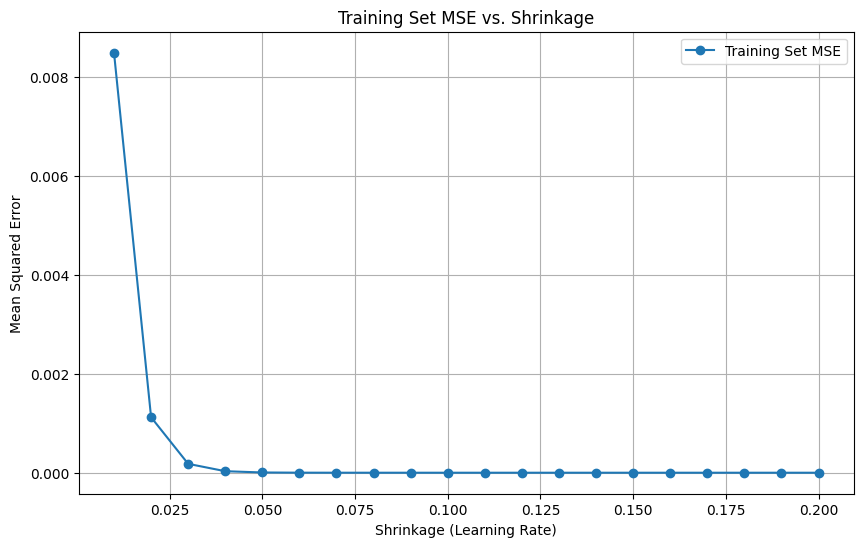

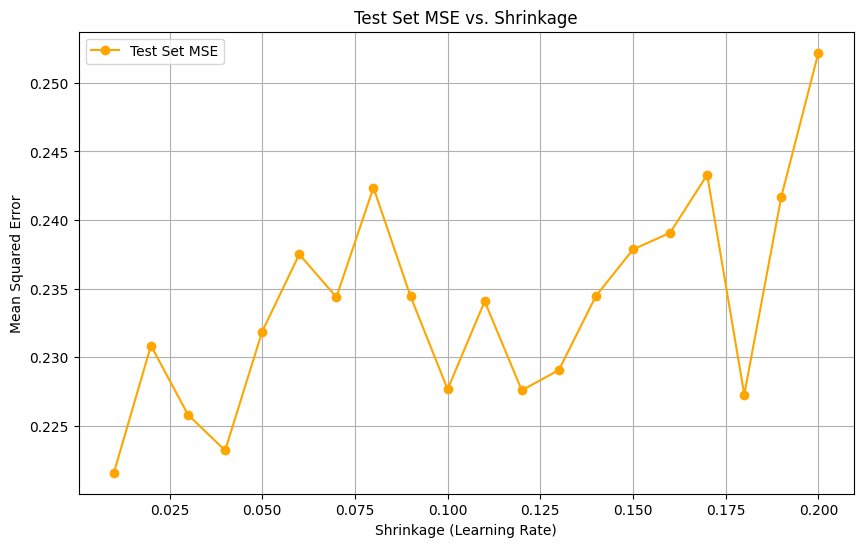

In [5]:

# Load the Hitters dataset
Hitters = load_data('Hitters').dropna()

Hitters['Salary'] = np.log(pd.to_numeric(Hitters['Salary'], errors='coerce'))

# Split dataset into training and test sets
seed_everything(0, workers=True)

# Prepare data for models
X = Hitters.drop(columns='Salary')
Y = Hitters['Salary']

X = pd.get_dummies(X, drop_first=True)

# Train-test split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=1/3, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_preds = linear_model.predict(X_test)
linear_mae = mean_absolute_error(Y_test, linear_preds)
print(f"Linear Regression MAE: {linear_mae}")

boosting_model = GBR(n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=0)
boosting_model.fit(X_train, Y_train)
boosting_preds = boosting_model.predict(X_test)
boosting_mae = mean_absolute_error(Y_test, boosting_preds)
print(f"Boosting MAE: {boosting_mae}")


X_train_t = torch.tensor(X_train.to_numpy().astype(np.float32))
Y_train_t = torch.tensor(Y_train.to_numpy().astype(np.float32))
X_test_t = torch.tensor(X_test.to_numpy().astype(np.float32))
Y_test_t = torch.tensor(Y_test.to_numpy().astype(np.float32))

train_data = TensorDataset(X_train_t, Y_train_t)
test_data = TensorDataset(X_test_t, Y_test_t)

hitters_dm = SimpleDataModule(
    train_data,
    test_data,
    batch_size=32,
    num_workers=4,
    validation=test_data
)

class HittersNN(nn.Module):
    def __init__(self, input_size):
        super(HittersNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 50),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return torch.flatten(self.network(x))

nn_model = HittersNN(X_train.shape[1])

# Set up SimpleModule for training
nn_optimizer = RMSprop(nn_model.parameters(), lr=0.001)
nn_module = SimpleModule.regression(
    nn_model,
    optimizer=nn_optimizer,
    metrics={'mae': MeanAbsoluteError()}
)

# Train the model using PyTorch Lightning
trainer = Trainer(
    deterministic=True,
    max_epochs=50,
    log_every_n_steps=5,
    callbacks=[ErrorTracker()]
)
trainer.fit(nn_module, datamodule=hitters_dm)

# Evaluate on test set
results = trainer.test(nn_module, datamodule=hitters_dm)
nn_mae = results[0]['test_mae']
print(f"Neural Network MAE: {nn_mae}")

bagging_model = RF(n_estimators=500, random_state=0)
bagging_model.fit(X_train, Y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_mae = mean_absolute_error(Y_test, bagging_preds)
print(f"Bagging MAE: {bagging_mae}")

shrinkage_values = np.linspace(0.01, 0.2, 20)
train_mse = []
test_mse = []

for shrinkage in shrinkage_values:
    boosting_model = GBR(
        n_estimators=1000, learning_rate=shrinkage, max_depth=3, random_state=0
    )
    boosting_model.fit(X_train, Y_train)

    # Compute MSE for training and test sets
    train_preds = boosting_model.predict(X_train)
    test_preds = boosting_model.predict(X_test)

    train_mse.append(mean_squared_error(Y_train, train_preds))
    test_mse.append(mean_squared_error(Y_test, test_preds))

importance = boosting_model.feature_importances_
predictor_names = X_train.columns
importance_df = pd.DataFrame({'Predictor': predictor_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(f"Top {N} Most Important Predictors:\n{importance_df.head(N)}")

# Plot Training Set MSE vs. Shrinkage
plt.figure(figsize=(10, 6))
plt.plot(shrinkage_values, train_mse, label='Training Set MSE', marker='o')
plt.xlabel('Shrinkage (Learning Rate)')
plt.ylabel('Mean Squared Error')
plt.title('Training Set MSE vs. Shrinkage')
plt.legend()
plt.grid()
plt.show()

# Plot Test Set MSE vs. Shrinkage
plt.figure(figsize=(10, 6))
plt.plot(shrinkage_values, test_mse, label='Test Set MSE', marker='o', color='orange')
plt.xlabel('Shrinkage (Learning Rate)')
plt.ylabel('Mean Squared Error')
plt.title('Test Set MSE vs. Shrinkage')
plt.legend()
plt.grid()
plt.show()


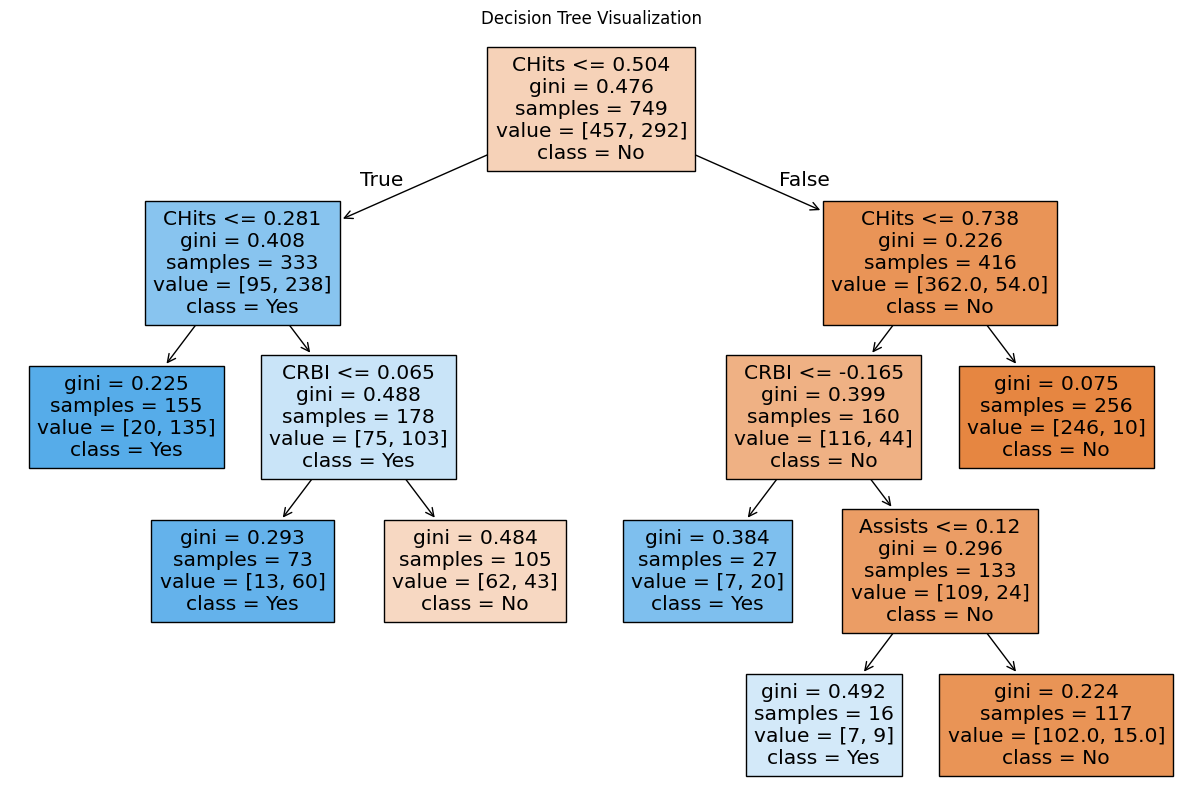

In [8]:
# Visualize the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.title("Decision Tree Visualization")
plt.show()



## Conclusion

Among the models tested, we evaluated performance based on accuracy, confusion matrices, and interpretability:

- **Logistic Regression** provided a good baseline and clear coefficients for interpretation.
- **LDA** had competitive accuracy and is effective when data distributions are Gaussian.
- **KNN** was flexible but sensitive to the number of neighbors and scaling.
- **Decision Trees** were intuitive but prone to overfitting without pruning.

This project demonstrates model comparison on a real-world classification dataset and offers insights into how model complexity and performance trade-offs influence decision-making in machine learning pipelines.
